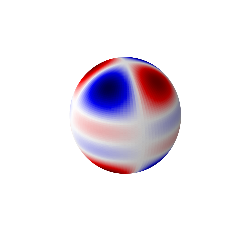

In [33]:
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.special import sph_harm

phi = np.linspace(0, np.pi, 100)
theta = np.linspace(0, 2*np.pi, 100)
phi, theta = np.meshgrid(phi, theta)

# The Cartesian coordinates of the unit sphere
x = np.sin(phi) * np.cos(theta)
y = np.sin(phi) * np.sin(theta)
z = np.cos(phi)

m, l = 2, 3

# Calculate the spherical harmonic Y(l,m) and normalize to [0,1]
fcolors = sph_harm(m, l, theta, phi).real
m2, l2 = 2, 5
fcolors2 = sph_harm(m2, l2, theta, phi).real

fcolors = fcolors + fcolors2
fmax, fmin = fcolors.max(), fcolors.min()
fcolors = (fcolors - fmin)/(fmax - fmin)

# Set the aspect ratio to 1 so our sphere looks spherical
fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z,  rstride=1, cstride=1, facecolors=cm.seismic(fcolors))
# Turn off the axis planes
ax.set_axis_off()
plt.show()

In [8]:
%matplotlib inline
from __future__ import print_function # only necessary if using Python 2.x

import matplotlib.pyplot as plt
import numpy as np
import pyshtools

In [9]:
degrees = np.arange(101, dtype=float)
degrees[0] = np.inf
power = degrees**(-2)

In [10]:
clm = pyshtools.SHCoeffs.from_random(power)

In [46]:
coeffsA = clm.to_array()
coeffsA.shape

(2, 101, 101)

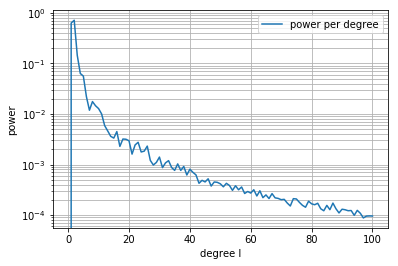

In [34]:
fig, ax = clm.plot_spectrum()

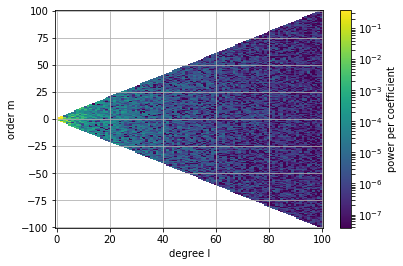

In [12]:
fig, ax = clm.plot_spectrum2d(vrange=(1.e-7,1))

In [14]:
clm_ortho = clm.convert(normalization='ortho', csphase=-1, lmax=50)

In [15]:
clm_ortho.info()

kind = 'real'
normalization = 'ortho'
csphase = -1
lmax = 50


[None, Text(0,0.5,'power'), Text(0.5,0,'degree')]

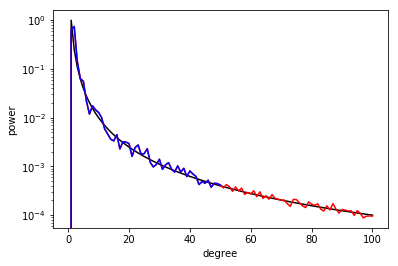

In [16]:
fix, ax = plt.subplots(1,1)
ax.plot(clm.degrees(), power, '-k', 
        clm.degrees(), clm.spectrum(), '-r', 
        clm_ortho.degrees(), clm_ortho.spectrum(), '-b')
ax.set(yscale='log', xlabel='degree', ylabel='power')

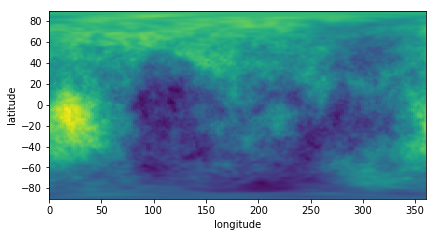

In [17]:
grid = clm.expand()
fig, ax = grid.plot()

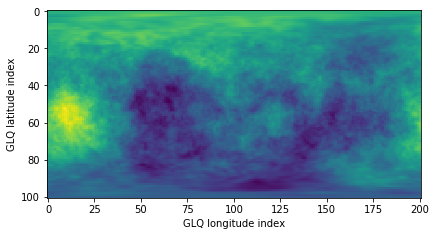

In [18]:
grid_glq = clm.expand(grid='GLQ')
grid_glq.plot()

lats = grid_glq.lats()
lons = grid_glq.lons()

In [19]:
grid_glq.info()

kind = 'real'
grid = 'GLQ'
nlat = 101
nlon = 201
lmax = 100


In [20]:
grid.info()

kind = 'real'
grid = 'DH'
sampling = 1
nlat = 202
nlon = 202
lmax = 100


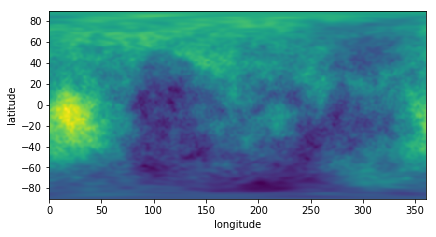

kind = 'real'
grid = 'DH'
sampling = 2
nlat = 202
nlon = 404
lmax = 100


In [21]:
l = 2
m = 0
value = 0.

clm.set_coeffs(value, l, m)
grid_dh2 = clm.expand(grid='DH2')
fig, ax = grid_dh2.plot()
grid_dh2.info()

In [22]:

coeffs = clm.to_array(lmax=4)
print(coeffs, end='\n\n')
print('c20 = {:f}'.format(coeffs[0,2,0]))

[[[-0.          0.          0.          0.          0.        ]
  [ 0.54599643  0.5624072   0.          0.          0.        ]
  [ 0.         -0.38932924  0.61224606  0.          0.        ]
  [ 0.17980252 -0.08175143 -0.17169247  0.00302062  0.        ]
  [-0.01316245 -0.05655143  0.00598374  0.00252333  0.0091259 ]]

 [[ 0.          0.          0.          0.          0.        ]
  [ 0.          0.12478277  0.          0.          0.        ]
  [ 0.          0.02297969  0.43428959  0.          0.        ]
  [ 0.          0.09569265 -0.08760555  0.24392184  0.        ]
  [ 0.          0.23778886 -0.05541791  0.01374147  0.0063526 ]]]

c20 = 0.000000


In [23]:
clm_new = grid_dh2.expand()

In [24]:
clm.expand(lat=[90., 10., -45., -90.], lon=[0., 90., 275., 0.])

[1.4270417302314646,
 -2.1540710369071783,
 -1.0935926128984912,
 -1.0715649034872063]

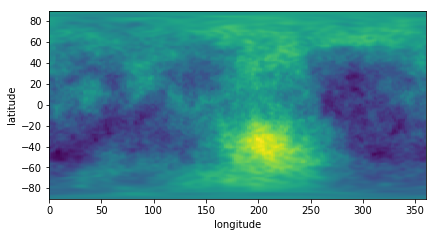

In [25]:
clat = 60.
clon = 180.

alpha = 0.
beta = -(90.-clat)
gamma = -clon

clm_rotated = clm.rotate(alpha, beta, gamma, degrees=True)
grid_rotated = clm_rotated.expand()
fig, ax = grid_rotated.plot()

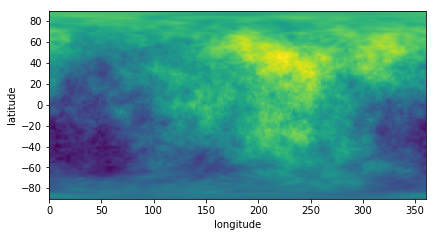

In [26]:
clm2 = pyshtools.SHCoeffs.from_random(power/10.)
grid2 = clm2.expand()
fig, ax = grid2.plot()

In [27]:
grid3 = 100 + 2*grid2 + grid**2 + grid/2 -100 - grid2*2 -grid*grid -grid/2
grid4 = grid3.copy()

In [28]:

print(pyshtools.constant.gm_earth)

398600441500000.0


In [29]:

pyshtools.constant.gm_earth.info()

Gravitational constant times the mass of the Earth.

398.6004415 10^12 m3 s-2

Reference
---------
N. K. Pavlis, S. A. Holmes, S. C. Kenyon, and J. K. Factor (2012). The
development and evaluation of the Earth Gravitational Model 2008 (EGM2008). J.
Geophys. Res. 117, B04406, doi:10.1029/2011JB008916.
